In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P \
    -O /tmp/sentiment.csv

--2023-09-19 04:29:53--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 64.233.181.139, 64.233.181.102, 64.233.181.101, ...
Connecting to drive.google.com (drive.google.com)|64.233.181.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8ggl8nku0p57o8ppmcpq1qpm4a5stdak/1695097725000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=2c95574c-a3b2-4538-b11b-d15eca711522 [following]
--2023-09-19 04:29:53--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8ggl8nku0p57o8ppmcpq1qpm4a5stdak/1695097725000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=2c95574c-a3b2-4538-b11b-d15eca711522
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 173.194.194.132, 2607:f8b0:4001:c10::84
Connecting to doc-0

In [ ]:
dataset = pd.read_csv('/tmp/sentiment.csv')

In [ ]:
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [ ]:
from typing_extensions import Text
sentences= dataset["text"].tolist()
labels= dataset["sentiment"].tolist()

# Create a subwords dataset

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
vocab_size= 1000
tokenizer= tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length=5)

In [ ]:
print(tokenizer)

<SubwordTextEncoder vocab_size=999>


In [ ]:
#check that the tokenizer works appropriately
num= 5
print(sentences[5])
encoded= tokenizer.encode(sentences[num])
print(encoded)

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [ ]:
#separately print out each subword, decode
for i in encoded:
  print(tokenizer.decode([i]))

I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


# Replace sentence data with encoded subwords
Now, we'll re-create the dataset to be used for training by actually encoding each of the individual sentences. This is equivalent to text_to_sequences with the Tokenizer we used in earlier exercises.

In [ ]:
for i, sentence in enumerate(sentences):
  sentences[i] = tokenizer.encode(sentence)

In [ ]:
print(sentences[1])

[625, 677, 626, 274, 380, 633, 148, 844, 789]


# Final pre-processing
Before training, we still need to pad the sequences, as well as split into training and test sets.



In [ ]:
#define variable
max_len= 50
trunc_type= "post"
padding_type="post"

In [ ]:
#pad all sentence
sen_padded= pad_sequences(sentences, maxlen= max_len, padding= padding_type, truncating= trunc_type)

In [ ]:
#data split
training_size= int(len(sentences)*.8)

training_sen= sen_padded[0:training_size]
testing_sen= sen_padded[training_size:]

training_lab= labels[0: training_size]
testing_lab= labels[training_size:]

#make labels into numpy array
training_lab= np.array(training_lab)
testing_lab= np.array(testing_lab)

# Make a sentiment model

In [ ]:
embedding_dim= 16
model= tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length= max_len),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(6, activation= "relu"),
  tf.keras.layers.Dense(1, activation= "sigmoid")
])

In [ ]:
epoch= 30
model.compile(loss= "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history= model.fit(training_sen, training_lab, epochs= epoch, validation_data=(testing_sen, testing_lab))

Epoch 1/30
50/50 [==============================] - 1s 7ms/step - loss: 0.6929 - accuracy: 0.5135 - val_loss: 0.6923 - val_accuracy: 0.5388
Epoch 2/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.6152 - val_loss: 0.6931 - val_accuracy: 0.4812
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.6315 - val_loss: 0.6870 - val_accuracy: 0.5313
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6683 - accuracy: 0.6830 - val_loss: 0.6776 - val_accuracy: 0.5539
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.7188 - val_loss: 0.6578 - val_accuracy: 0.6341
Epoch 6/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6139 - accuracy: 0.7621 - val_loss: 0.6352 - val_accuracy: 0.6617
Epoch 7/30
50/50 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.7935 - val_loss: 0.6089 - val_accuracy: 0.7018
Epoch 8/30
50/50 [==

Visualize accuracy and loss graph

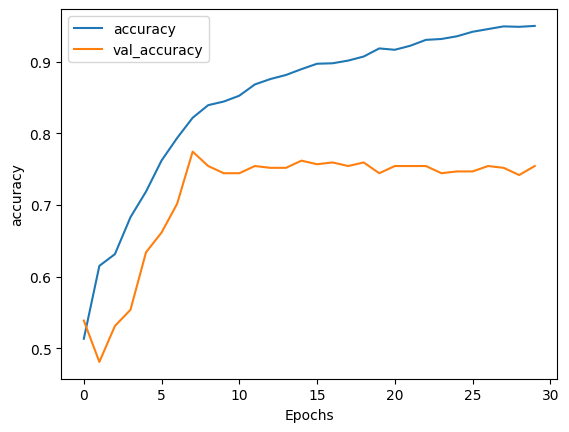

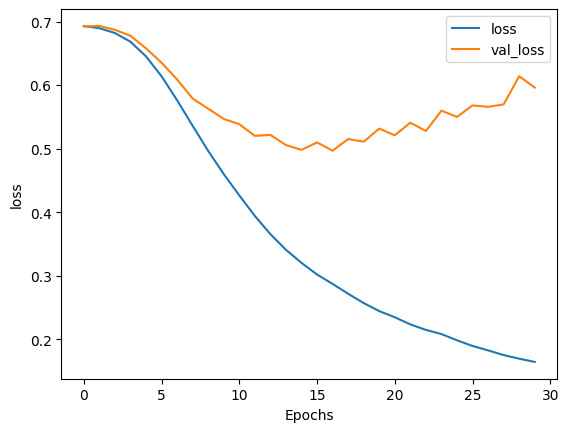

In [ ]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' +string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, "val_"+string])
  plt.show()

plot_graph(history, "accuracy")
plot_graph(history, "loss")